In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

!pip install tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 95.2MB 45kB/s 
     |████████████████████████████████| 450kB 71.5MB/s 
     |████████████████████████████████| 3.8MB 46.1MB/s 
     |████████████████████████████████| 81kB 13.2MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
ERROR: tb-nightly 2.1.0a20191206 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


2.0.0-dev20191002


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


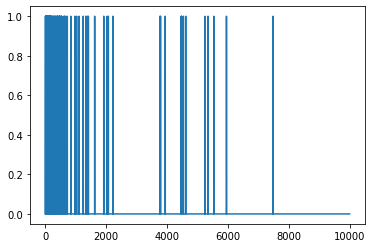

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', 
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                    validation_data=(test_data, test_labels),verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5036 - accuracy: 0.7970 - binary_crossentropy: 0.5036 - val_loss: 0.3445 - val_accuracy: 0.8737 - val_binary_crossentropy: 0.3445
Epoch 2/20
25000/25000 - 2s - loss: 0.2555 - accuracy: 0.9089 - binary_crossentropy: 0.2555 - val_loss: 0.2847 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2847
Epoch 3/20
25000/25000 - 2s - loss: 0.1863 - accuracy: 0.9349 - binary_crossentropy: 0.1863 - val_loss: 0.2868 - val_accuracy: 0.8857 - val_binary_crossentropy: 0.2868
Epoch 4/20
25000/25000 - 2s - loss: 0.1463 - accuracy: 0.9514 - binary_crossentropy: 0.1463 - val_loss: 0.3048 - val_accuracy: 0.8810 - val_binary_crossentropy: 0.3048
Epoch 5/20
25000/25000 - 2s - loss: 0.1173 - accuracy: 0.9626 - binary_crossentropy: 0.1173 - val_loss: 0.3320 - val_accuracy: 0.8763 - val_binary_crossentropy: 0.3320
Epoch 6/20
25000/25000 - 3s - loss: 0.0931 - accuracy: 0.9726 - binary_crossentropy: 0.0931 - val_loss: 0.3634

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy', 
                       metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                    validation_data=(test_data, test_labels),verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5848 - accuracy: 0.7797 - binary_crossentropy: 0.5848 - val_loss: 0.4828 - val_accuracy: 0.8497 - val_binary_crossentropy: 0.4828
Epoch 2/20
25000/25000 - 2s - loss: 0.3886 - accuracy: 0.8804 - binary_crossentropy: 0.3886 - val_loss: 0.3639 - val_accuracy: 0.8722 - val_binary_crossentropy: 0.3639
Epoch 3/20
25000/25000 - 2s - loss: 0.2858 - accuracy: 0.9082 - binary_crossentropy: 0.2858 - val_loss: 0.3112 - val_accuracy: 0.8834 - val_binary_crossentropy: 0.3112
Epoch 4/20
25000/25000 - 2s - loss: 0.2311 - accuracy: 0.9273 - binary_crossentropy: 0.2311 - val_loss: 0.2912 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2912
Epoch 5/20
25000/25000 - 2s - loss: 0.1975 - accuracy: 0.9367 - binary_crossentropy: 0.1975 - val_loss: 0.2844 - val_accuracy: 0.8885 - val_binary_crossentropy: 0.2844
Epoch 6/20
25000/25000 - 2s - loss: 0.1728 - accuracy: 0.9450 - binary_crossentropy: 0.1728 - val_loss: 0.2857

In [8]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy', 
                       metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512,
                                    validation_data=(test_data, test_labels),verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 16s - loss: 0.3422 - accuracy: 0.8534 - binary_crossentropy: 0.3422 - val_loss: 0.2957 - val_accuracy: 0.8785 - val_binary_crossentropy: 0.2957
Epoch 2/20
25000/25000 - 15s - loss: 0.1411 - accuracy: 0.9490 - binary_crossentropy: 0.1411 - val_loss: 0.3294 - val_accuracy: 0.8725 - val_binary_crossentropy: 0.3294
Epoch 3/20
25000/25000 - 15s - loss: 0.0459 - accuracy: 0.9857 - binary_crossentropy: 0.0459 - val_loss: 0.4385 - val_accuracy: 0.8691 - val_binary_crossentropy: 0.4385
Epoch 4/20
25000/25000 - 15s - loss: 0.0070 - accuracy: 0.9991 - binary_crossentropy: 0.0070 - val_loss: 0.6067 - val_accuracy: 0.8708 - val_binary_crossentropy: 0.6067
Epoch 5/20
25000/25000 - 15s - loss: 8.4462e-04 - accuracy: 1.0000 - binary_crossentropy: 8.4462e-04 - val_loss: 0.6825 - val_accuracy: 0.8712 - val_binary_crossentropy: 0.6825
Epoch 6/20
25000/25000 - 15s - loss: 2.5917e-04 - accuracy: 1.0000 - binary_crossentropy: 2.5917e

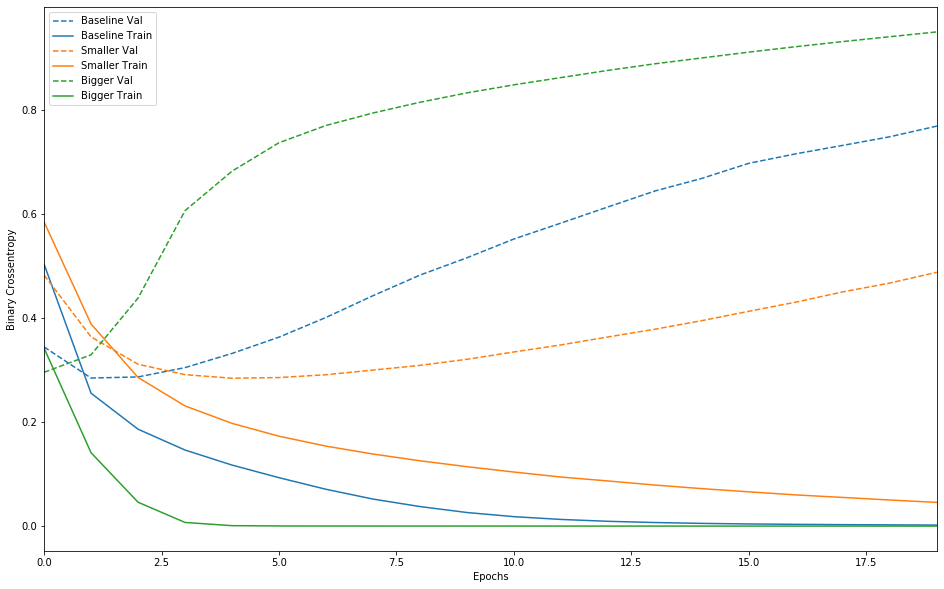

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])